<a href="https://colab.research.google.com/github/Logesh7-R/DATA_SCIENCE_AI_DEEP_LEARNING/blob/main/project_heart_disease_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import tensorflow as tf
from keras.layers import Dense,Dropout
from keras.models import Sequential


In [ ]:
df1 = pd.read_csv("heart.csv")
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
list = ['Age','Sex','RestingBP','MaxHR','HeartDisease']

In [ ]:
df = df1[list]

In [ ]:
df.head()

,Age,Sex,RestingBP,MaxHR,HeartDisease
0,40,M,140,172,0
1,49,F,160,156,1
2,37,M,130,98,0
3,48,F,138,108,1
4,54,M,150,122,0


In [ ]:
enc = LabelEncoder()
df['Sex'] = enc.fit_transform(df['Sex'])
sex_map = dict(zip(enc.classes_,enc.transform(enc.classes_)))
sex_map

<ipython-input-6-7ae967075b67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = enc.fit_transform(df['Sex'])


{'F': 0, 'M': 1}

In [ ]:
df.describe()


,Age,Sex,RestingBP,MaxHR,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,136.809368,0.553377
std,9.432617,0.407701,18.514154,25.460334,0.497414
min,28.000000,0.000000,0.000000,60.000000,0.000000
25%,47.000000,1.000000,120.000000,120.000000,0.000000
50%,54.000000,1.000000,130.000000,138.000000,1.000000
75%,60.000000,1.000000,140.000000,156.000000,1.000000
max,77.000000,1.000000,200.000000,202.000000,1.000000


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'MaxHR'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >]], dtype=object)

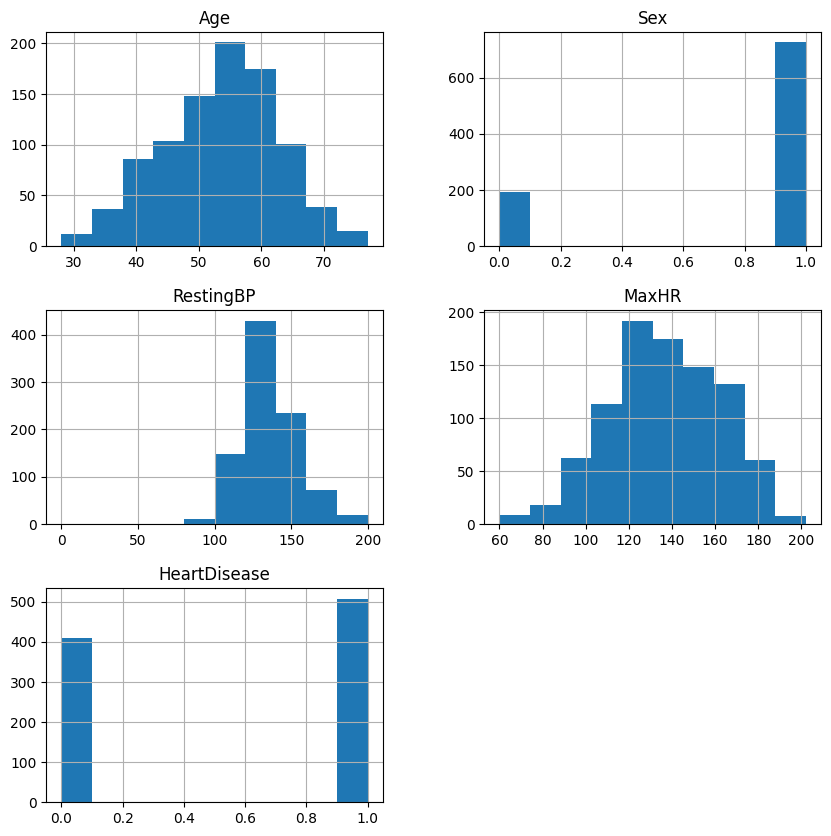

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           918 non-null    int64
 1   Sex           918 non-null    int64
 2   RestingBP     918 non-null    int64
 3   MaxHR         918 non-null    int64
 4   HeartDisease  918 non-null    int64
dtypes: int64(5)
memory usage: 36.0 KB


In [ ]:
df.corr()

,Age,Sex,RestingBP,MaxHR,HeartDisease
Age,1.000000,0.055750,0.254399,-0.382045,0.282039
Sex,0.055750,1.000000,0.005133,-0.189186,0.305445
RestingBP,0.254399,0.005133,1.000000,-0.112135,0.107589
MaxHR,-0.382045,-0.189186,-0.112135,1.000000,-0.400421
HeartDisease,0.282039,0.305445,0.107589,-0.400421,1.000000


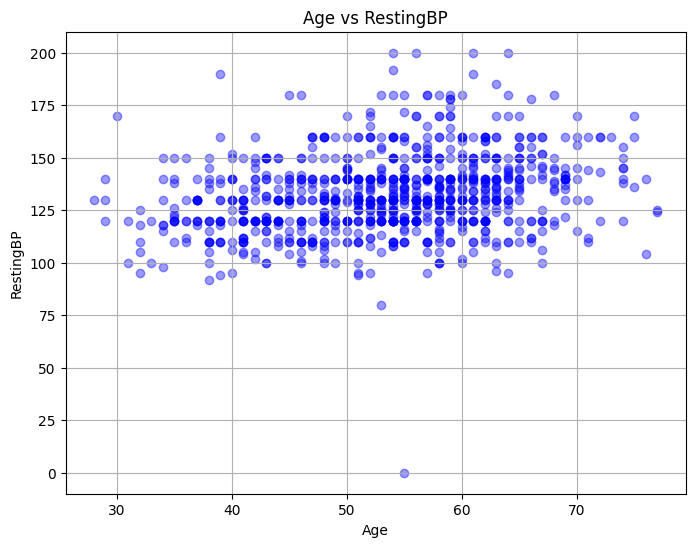

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Age'],df['RestingBP'],color='blue',alpha=0.4)
plt.xlabel("Age")
plt.ylabel('RestingBP')
plt.grid(True)
plt.title("Age vs RestingBP")
plt.show()

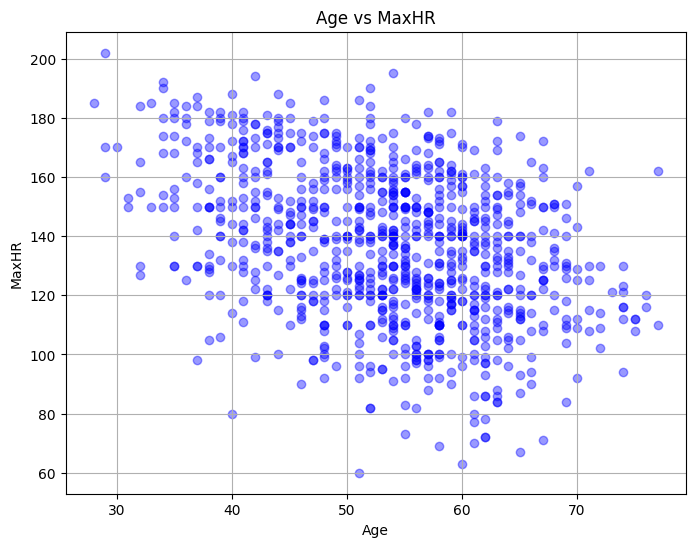

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Age'],df['MaxHR'],color='blue',alpha=0.4)
plt.xlabel("Age")
plt.ylabel('MaxHR')
plt.grid(True)
plt.title("Age vs MaxHR")
plt.show()

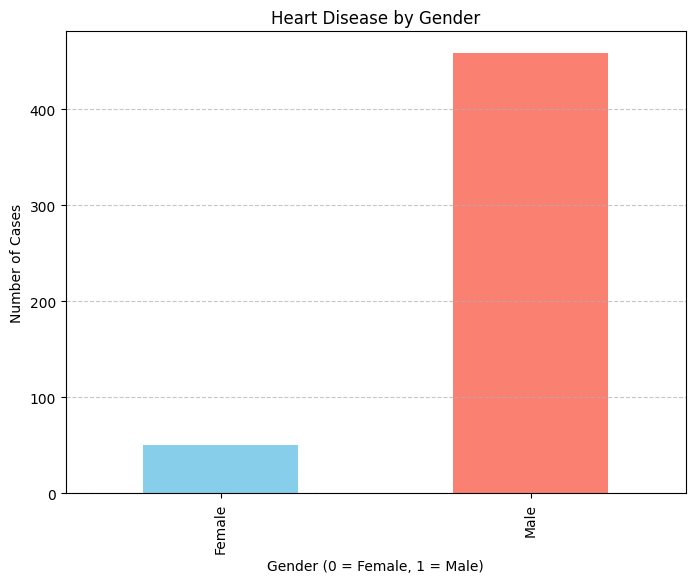

(Sex
 0     50
 1    458
 Name: HeartDisease, dtype: int64,
 (918, 5))

In [ ]:
heart_disease_by_gender = df.groupby('Sex')['HeartDisease'].sum()


plt.figure(figsize=(8, 6))
heart_disease_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
heart_disease_by_gender,df.shape

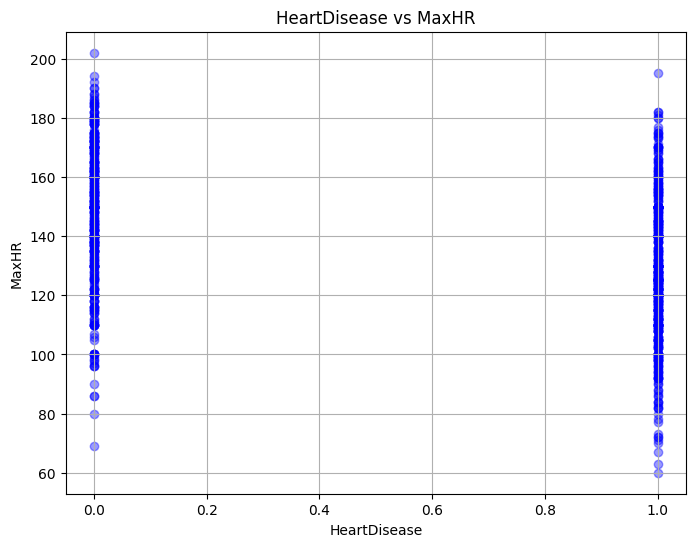

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['HeartDisease'],df['MaxHR'],color='blue',alpha=0.4)
plt.xlabel("HeartDisease")
plt.ylabel('MaxHR')
plt.grid(True)
plt.title("HeartDisease vs MaxHR")
plt.show()

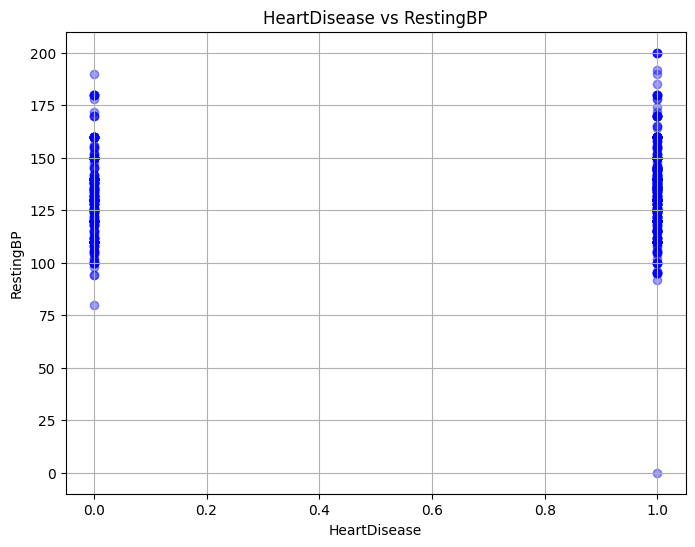

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['HeartDisease'],df['RestingBP'],color='blue',alpha=0.4)
plt.xlabel("HeartDisease")
plt.ylabel('RestingBP')
plt.grid(True)
plt.title("HeartDisease vs RestingBP")
plt.show()

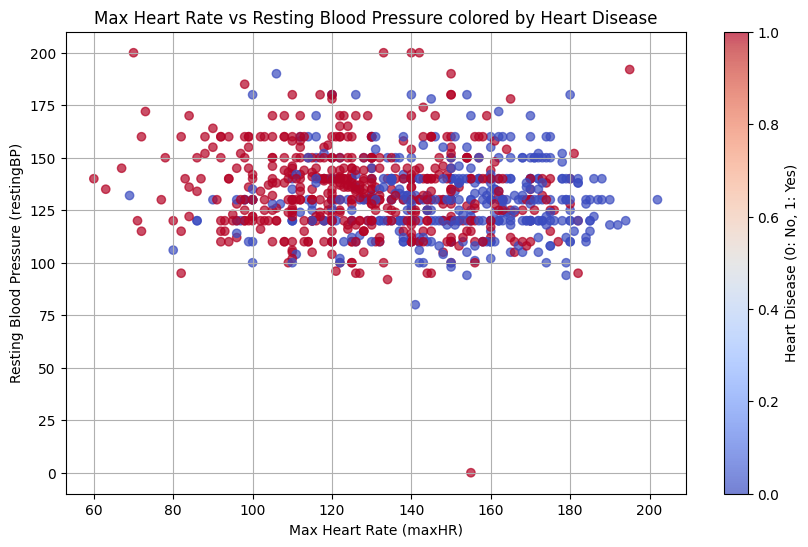

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['MaxHR'], df['RestingBP'], c=df['HeartDisease'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Heart Disease (0: No, 1: Yes)')
plt.xlabel('Max Heart Rate (maxHR)')
plt.ylabel('Resting Blood Pressure (restingBP)')
plt.title('Max Heart Rate vs Resting Blood Pressure colored by Heart Disease')
plt.grid(True)
plt.show()


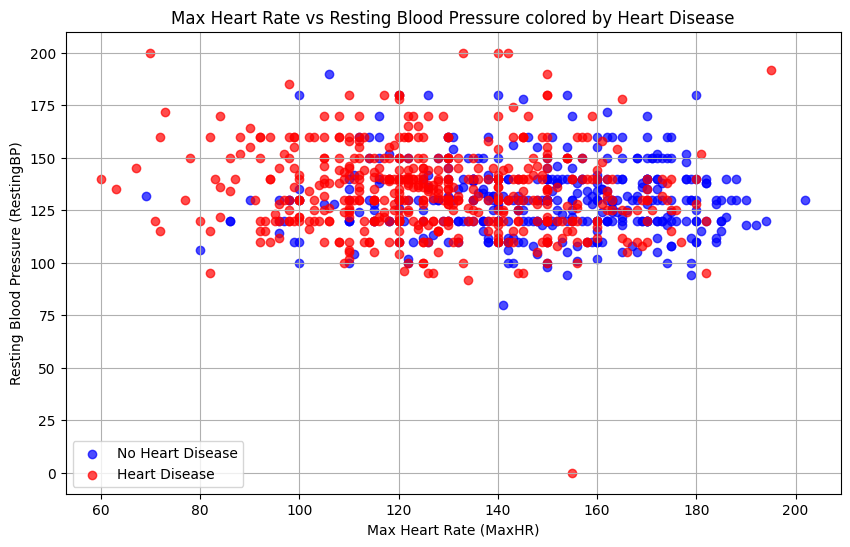

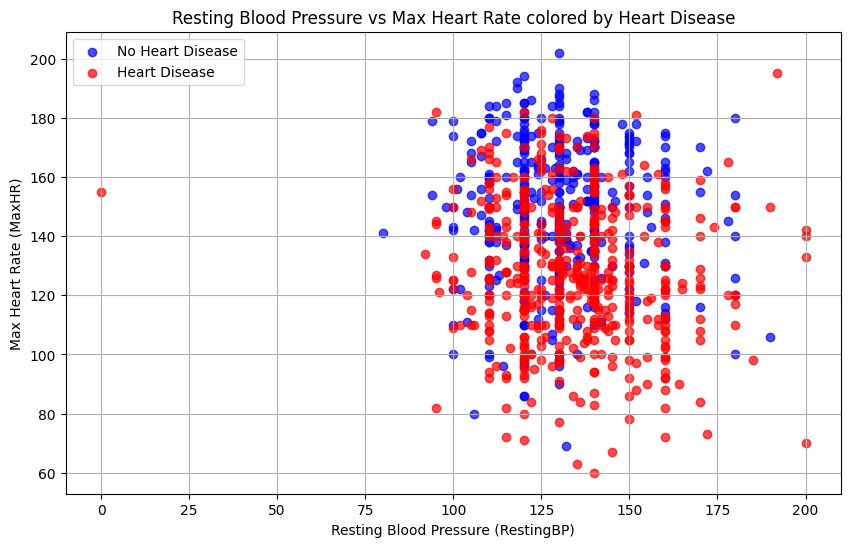

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df[df['HeartDisease'] == 0]['MaxHR'], df[df['HeartDisease'] == 0]['RestingBP'], color='blue', label='No Heart Disease', alpha=0.7)
plt.scatter(df[df['HeartDisease'] == 1]['MaxHR'], df[df['HeartDisease'] == 1]['RestingBP'], color='red', label='Heart Disease', alpha=0.7)
plt.xlabel('Max Heart Rate (MaxHR)')
plt.ylabel('Resting Blood Pressure (RestingBP)')
plt.title('Max Heart Rate vs Resting Blood Pressure colored by Heart Disease')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(df[df['HeartDisease'] == 0]['RestingBP'], df[df['HeartDisease'] == 0]['MaxHR'], color='blue', label='No Heart Disease', alpha=0.7)
plt.scatter(df[df['HeartDisease'] == 1]['RestingBP'], df[df['HeartDisease'] == 1]['MaxHR'], color='red', label='Heart Disease', alpha=0.7)
plt.xlabel('Resting Blood Pressure (RestingBP)')
plt.ylabel('Max Heart Rate (MaxHR)')
plt.title('Resting Blood Pressure vs Max Heart Rate colored by Heart Disease')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_1 = df[df['HeartDisease']==1]
df_1.head()

,Age,Sex,RestingBP,MaxHR,HeartDisease
1,49,0,160,156,1
3,48,0,138,108,1
8,37,1,140,130,1
11,58,1,136,99,1
13,49,1,140,140,1


In [ ]:
df_0 = df[df['HeartDisease']==0]

In [ ]:
list=df.columns.to_list()
list.remove('HeartDisease')
list

['Age', 'Sex', 'RestingBP', 'MaxHR']

In [ ]:
x=df[list]
y = pd.DataFrame(df['HeartDisease'])
from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test = train_test_split(x,y,shuffle=True,random_state=7,test_size=0.3)
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression()
slr.fit(x_tr,y_tr)
y_pred = slr.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix
accuracy_slr=accuracy_score(y_pred, y_test)*100
matrix_slr=confusion_matrix(y_test, y_pred)
precision_slr=precision_score(y_test, y_pred)
recall_slr=recall_score(y_test, y_pred)
f1_slr=f1_score(y_test, y_pred)

In [ ]:
accuracy_slr

73.91304347826086

In [ ]:
new_data = np.array([[40, 0, 160, 156]])
new_data = df_1[list].head(20)
slr.predict(new_data)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
df_1['HeartDisease'].head(20)

1     1
3     1
8     1
11    1
13    1
16    1
18    1
19    1
23    1
30    1
32    1
33    1
36    1
41    1
44    1
49    1
50    1
51    1
56    1
57    1
Name: HeartDisease, dtype: int64

In [ ]:
x=df[list]
y = pd.DataFrame(df['HeartDisease'])
from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test = train_test_split(x,y,shuffle=True,random_state=7,test_size=0.3)

In [ ]:
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_test = sc.transform(x_test)

In [ ]:
x_test,x_tr.shape[1:]

(array([[ 0.50448056,  0.50145986,  0.72151676, -1.2807817 ],
        [ 2.28000487,  0.50145986,  1.46223551, -1.00239938],
        [-0.01773247,  0.50145986,  1.14478462,  0.11112993],
        ...,
        [ 0.50448056,  0.50145986, -0.65410377,  0.906508  ],
        [ 0.29559535,  0.50145986,  1.1976931 , -1.51939513],
        [ 0.19115274,  0.50145986,  0.40406587,  0.50881896]]),
 (4,))

In [ ]:
model = Sequential()
model.add(Dense(60,input_shape=(4,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
x.ndim

2

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
model.compile(loss='binary_crossentropy' , optimizer = optimizer,metrics=['accuracy'])
learning_rate = model.optimizer.learning_rate.numpy()
print(f'Learning rate: {learning_rate}')

Learning rate: 0.0010000000474974513


In [ ]:
history = model.fit(x_tr, y_tr, epochs=25, batch_size=10 ,verbose=0,validation_data=(x_test, y_test))

In [ ]:
loss,accuracy = model.evaluate(x_test , y_test)
print("test loss :",loss,"\naccuracy :",accuracy)

9/9 [==============================] - 0s 3ms/step - loss: 0.5656 - accuracy: 0.7536
test loss : 0.5655727982521057 
accuracy : 0.7536231875419617


In [ ]:
y_pred = model.predict(x_test)


9/9 [==============================] - 0s 3ms/step


In [ ]:

threshold = 0.5
y_pred = np.where(y_pred > threshold, 1, 0)


In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score

In [ ]:
accuracy=accuracy_score( y_test,y_pred)*100
matrix=confusion_matrix(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

Text(0.5, 1.0, 'ANN')

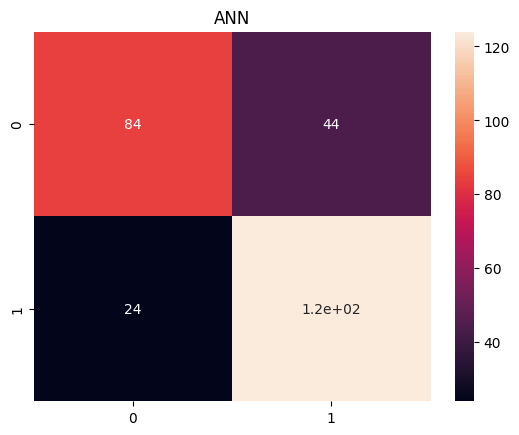

In [ ]:
import seaborn as sns
sns.heatmap(matrix, annot=True)
plt.title('ANN')

In [ ]:
print(f'Recall Score of ANN:{recall*100}')
print(f'precision Score of ANN:{precision*100}')
print(f'f1 Score of ANN:{f1*100}')
print(f'accuracy of ANN:{accuracy}')

Recall Score of ANN:83.78378378378379
precision Score of ANN:73.80952380952381
f1 Score of ANN:78.48101265822785
accuracy of ANN:75.36231884057972


In [ ]:
num = matrix[1][1]
number1 = float(num)
print( number1)


124.0


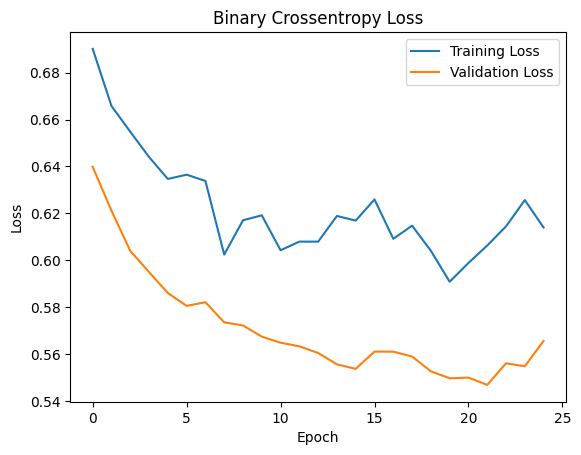

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Binary Crossentropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import joblib
model.save('model.keras')

joblib.dump(enc, 'label_encoder.pkl')
joblib.dump(sc, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [ ]:
print(f'accuracy of ANN: {accuracy:.2f}')

accuracy of ANN: 75.36


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model.keras')


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                300       
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model.keras')